<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting up</a></span></li></ul></li><li><span><a href="#Additional-analysis" data-toc-modified-id="Additional-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Additional analysis</a></span><ul class="toc-item"><li><span><a href="#Particpants-and-dropping" data-toc-modified-id="Particpants-and-dropping-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Particpants and dropping</a></span></li><li><span><a href="#Job-title" data-toc-modified-id="Job-title-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Job title</a></span></li><li><span><a href="#Gender-difference" data-toc-modified-id="Gender-difference-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gender difference</a></span><ul class="toc-item"><li><span><a href="#Difference-in-contract-length" data-toc-modified-id="Difference-in-contract-length-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Difference in contract length</a></span></li></ul></li><li><span><a href="#Difference-in-salary" data-toc-modified-id="Difference-in-salary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Difference in salary</a></span><ul class="toc-item"><li><span><a href="#Difference-in-satisfaction-at-work" data-toc-modified-id="Difference-in-satisfaction-at-work-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Difference in satisfaction at work</a></span></li></ul></li><li><span><a href="#Profile-of-openess-of-RSE" data-toc-modified-id="Profile-of-openess-of-RSE-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Profile of openess of RSE</a></span></li><li><span><a href="#Academic-fields-and-multidisciplinarity" data-toc-modified-id="Academic-fields-and-multidisciplinarity-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Academic fields and multidisciplinarity</a></span></li><li><span><a href="#References" data-toc-modified-id="References-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# Introduction

In [1]:
import itertools
import string

## Setting up

In [2]:
%%capture  
# Import notebook containing the imports the functions and the dataset
%run "./0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "./1. Overview and sampling.ipynb"

In [3]:
common_columns = ['Country', 'Year']

# Additional analysis

This notebook is for all analysis that are going further than simple descriptive analysis.
It contains further developments.

## Particpants and dropping

In [4]:
df_raw = pd.read_csv('./../2018/data/raw_data.csv', low_memory=False)
full_size = len(df_raw)
print('There is a total of {} participants to the survey, prior to any cleaning'.format(full_size))

There is a total of 1466 participants to the survey, prior to any cleaning


In [5]:
last_page = df[df["lastpage. Last page"] != -1.0]["lastpage. Last page"].value_counts(dropna=False).to_frame()
last_page.columns = ['Count']
last_page.index.name = 'Last page reached'
last_page['Percentage'] = round(last_page['Count'] / last_page['Count'].sum() *100)
last_page.sort_index(inplace=True)
#last_page.reset_index(inplace=True)
#last_page['Last page reached'] = last_page['Last page reached'].astype(str)
last_page

,Count,Percentage
Last page reached,,
2.0,35,2.0
3.0,67,4.0
5.0,19,1.0
6.0,4,0.0
7.0,8,0.0
8.0,851,47.0
NaN,828,46.0


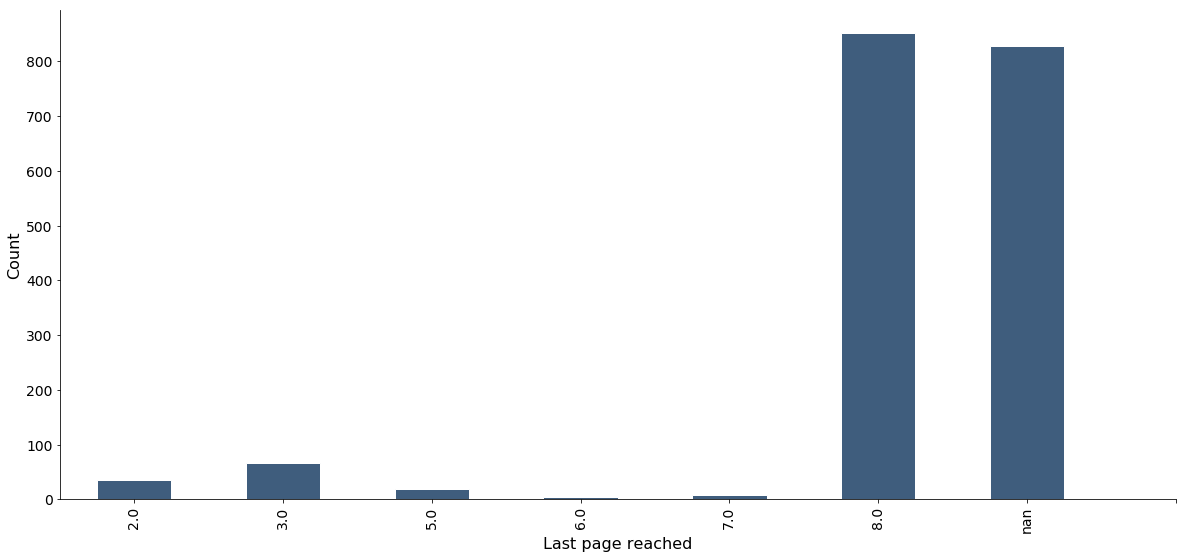

In [6]:
# Creating the figure
plt.figure(figsize=(20, 9))    
ax = plt.subplot(111)  
last_page['Count'].plot(kind='bar', color="#3F5D7D", ec='white')
# Removing the edge lines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Setting up the x and y axis
plt.xticks(range(0, 8, 1), fontsize=14)  
plt.yticks(fontsize=14)  

# Labelling the axis
plt.xlabel("Last page reached", fontsize=16)  
plt.ylabel("Count", fontsize=16)

plt.show();

## Job title

Here, we get the 5 most common Job title per country during the 2018 survey

In [7]:
title_job = ['currentEmp5. What is your official job title?']
all_col_title = title_job + ['Country']

In [8]:
df_job_title = df[df['Year'] == 2018][all_col_title].copy()
df_job_title[title_job[0]] = df_job_title[title_job[0]].str.replace('[{}]'.format(string.punctuation), ' ')
df_job_title.replace('\s+', ' ', regex=True,inplace=True)
df_job_title[title_job[0]] = df_job_title[title_job[0]].str.lower().str.rstrip()
df_job_title.replace('rse', 'Research Software Engineer', inplace=True)
df_job_title[title_job[0]] = df_job_title[title_job[0]].str.title()

In [9]:
job_titles = df_job_title.groupby('Country')["currentEmp5. What is your official job title?"].value_counts().to_frame()
job_titles.columns = ['Count']
job_titles = job_titles.reset_index()
job_titles.groupby('Country').head(5)

,Country,currentEmp5. What is your official job title?,Count
0,Australia,Research Scientist,8
1,Australia,Research Fellow,6
2,Australia,It Advisor,3
3,Australia,Phd Student,3
4,Australia,Postdoctoral Fellow,3
62,Germany,Wissenschaftlicher Mitarbeiter,73
63,Germany,Postdoc,13
64,Germany,Research Assistant,8
65,Germany,Research Associate,8
66,Germany,Phd Student,7


## Gender difference

In [10]:
gender = ["socio2. Please select your gender"]
salary = ['socio4. Please select the range of your salary']
duration_contract = ['currentEmp11. What is the expected duration (in years) of your current position (in total)?']

satis_gen = ['satisGen1. In general, how satisfied are you with your current position', 'satisGen2. In general, how satisfied are you with your career']

recog = ['recog1. Do you feel that your contribution to research is recognised by your supervisor/line manager',
         'recog2. Do you feel that your contribution to research is recognised by the researchers you work with',
         'recog3. Do you feel that your contribution to research is recognised by your institution?']

turn_over1 = ['turnOver3. How often do you consider leaving your job?']
turn_over2 = ['turnOver6. I would accept another job at the same compensation level if I was offered it']

perc_emp =['percEmp1. It would not be very difficult for me to get an equivalent job in a different institution',
           'percEmp3. My experience is in demand on the labour market']

prog_rse = ['progRSE1. It is likely that I will gain a promotion within my current group',
            'progRSE2. The process I have to complete to gain a promotion is clear and understandable',
            'progRSE3. There are many opportunities within my chosen career plan',
            'progRSE5. It is likely that my next position will be an Research Software Engineer / Research Software Developer role']

In [11]:
df_gender = df[df['Year'] == 2018][list(itertools.chain(common_columns, gender, duration_contract, salary, satis_gen, recog, turn_over1, turn_over2, perc_emp, prog_rse))].copy()

In [12]:
gender_per_country = df_gender.groupby('Country')["socio2. Please select your gender"].value_counts().to_frame()
gender_per_country.columns = ['Count']
#gender_per_country = gender_per_country.reset_index()

In [13]:
gender_per_country

Count
Country        socio2. Please select your gender       
Australia      Male                                  69
               Female                                12
               Prefer not to say                      3
Germany        Male                                 243
               Female                                27
               Prefer not to say                     11
Netherlands    Male                                  43
               Female                                 4
               Prefer not to say                      2
New Zealand    Male                                  31
               Female                                 3
South Africa   Male                                  17
               Female                                 2
United Kingdom Male                                 162
               Female                                29
               Prefer not to say                     11
               Other                                  1
United States  Male                                  98
               Female                                29
               Prefer not to say                      4
               Other                                  3
World          Male                                  37
               Female                                 3

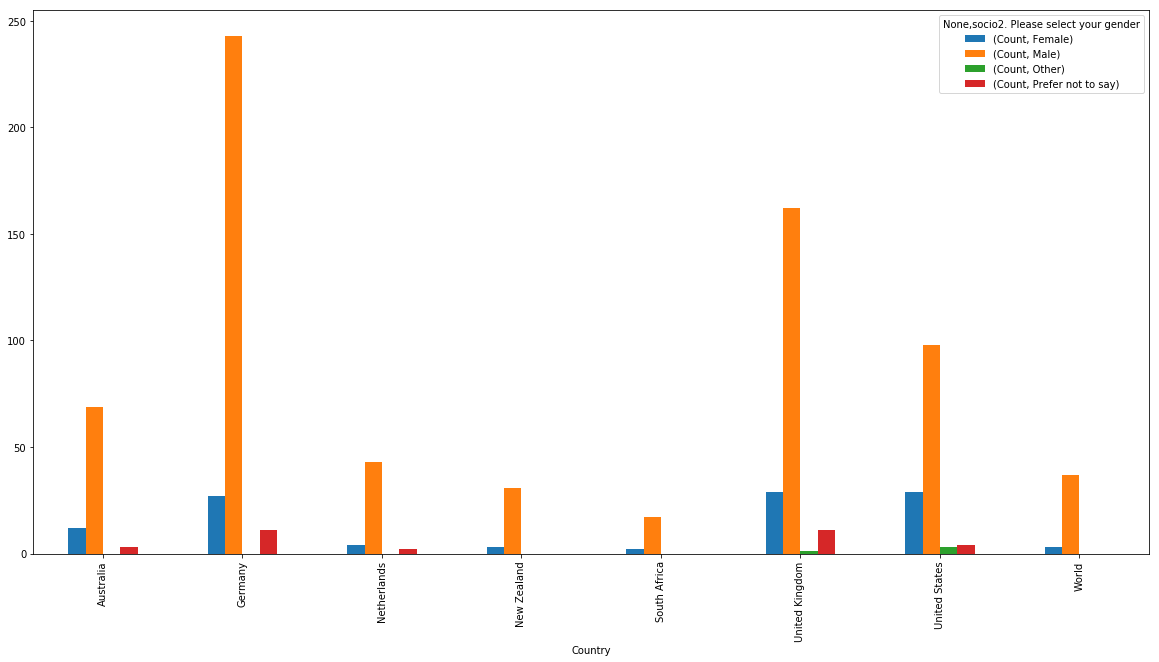

In [14]:
gender_per_country.unstack().plot(kind='bar');

In [15]:
df_gender_perc = df_gender["socio2. Please select your gender"].value_counts().to_frame()
df_gender_perc['Percentage'] = (df_gender_perc['socio2. Please select your gender'] / df_gender_perc['socio2. Please select your gender'].sum())*100
df_gender_perc = df_gender_perc.reset_index()
df_gender_perc

,index,socio2. Please select your gender,Percentage
0,Male,700,82.938389
1,Female,109,12.914692
2,Prefer not to say,31,3.672986
3,Other,4,0.473934


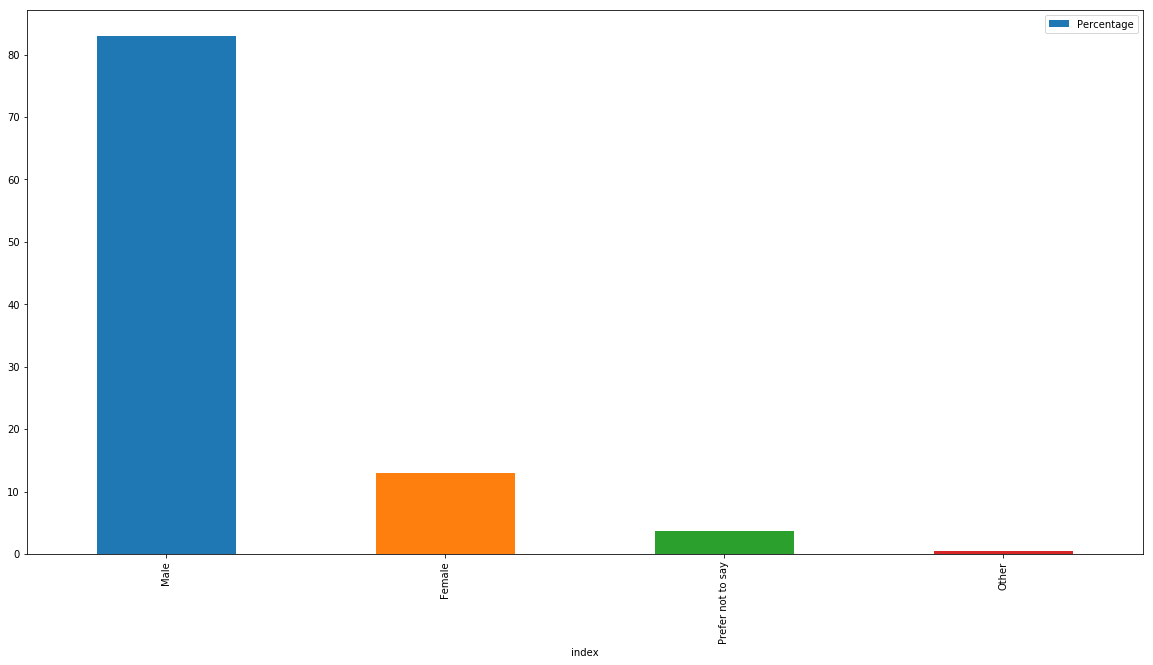

In [16]:
df_gender_perc.plot(kind='bar', x='index', y='Percentage');

The low number of women in RSE is striking, in all countries. In total, women account for 13 percents of the total of the participants. 

We are interested in the difference between gender. In the following analysis, we aggregate the results from all countries to see if there are difference between men and women. We are also dropping the people that answered 'Prefer not to say' and 'Other' as the total of these categories is really low. 

In [17]:
df_gender_final = df_gender[(df['socio2. Please select your gender'] == 'Male') | (df['socio2. Please select your gender'] == 'Female')]

/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Difference in contract length 

In [18]:
df_gender_final.drop(['Country', 'Year'], axis=1, inplace=True)

/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
df_gender_final[df_gender_final['currentEmp11. What is the expected duration (in years) of your current position (in total)?'] < 50].groupby('socio2. Please select your gender')['currentEmp11. What is the expected duration (in years) of your current position (in total)?'].describe()

,count,mean,std,min,25%,50%,75%,max
socio2. Please select your gender,,,,,,,,
Female,78.0,8.606192,10.994955,0.083,2.0,3.5,9.75,45.0
Male,532.0,7.002632,8.775801,0.000,2.0,3.0,7.00,45.0


## Difference in salary

In [20]:
aus_salary = ['< AUD 45,000', '≥ AUD 45,000 and < AUD 65,000', '≥ AUD 65,000 and < AUD 85,000',
                  '≥ AUD 85,000 and < AUD 105,000', '≥ AUD 105,000 and < AUD 120,000', '≥ AUD 120,000']
de_salary = ['Less than 27.499 EUR', 'Between 27.500 and 32.999 EUR', 'Between 33.000 and 38.499 EUR',
                  'Between 38.500 and 43.999 EUR', 'Between 44.000 and 49.999 EUR','Between 50.000 and 54.999 EUR',
                  'Between 55.000 and 65.999 EUR', 'Between 66.000 and 76.999 EUR', 'Between 77.000 and 109.999 EUR', 'Prefer not to say']
nl_salary = ['Less than 27.499 EUR', 'Between 27.500 and 32.999 EUR', 'Between 33.000 and 38.499 EUR',
             'Between 38.500 and 43.999 EUR', 'Between 44.000 and 49.999 EUR','Between 50.000 and 54.999 EUR',
             'Between 55.000 and 65.999 EUR', 'Between 66.000 and 76.999 EUR', 'Between 77.000 and 109.999 EUR', 'Prefer not to say']
nzl_salary = ['< NZD 45,000', 
              '≥ NZD 45,000 and < NZD 65,000',
              '≥ NZD 65,000 and < NZD 85,000',
              '≥ NZD 85,000 and < NZD 105,000',
              '≥ NZD 105,000 and < NZD 120,000', 
              '≥ NZD 120,000']
zaf_salary= ['Less than R 189 880',
             'Between R 189 881 and R 296 540',
             'Between R 296 541 and R 410 460',
             'Between R 410 461 and R 555 600',
             'Between R 555 601 and R 708 310',
             'Between R 708 311 and R 1 500 000',
              'More than R 1 500 000', 
            'Prefer not to say']

### Difference in satisfaction at work

We used several indicators for satisfaction at work. Here we will transform them into a 3 possible state: Negative, Neutral, Positive.

In [21]:
replace_agree = {'Strongly disagree': 0 ,
                 'Disagree': 1, 
                 'Neither agree or disagree': 2,
                 'Agree': 3,
                 'Strongly Agree': 4}

replace_satis_10 = {'\ufeff0 - Not at all satisfied': 'Negative',
                     '1': 'Negative',
                     '2': 'Negative',
                     '3': 'Negative',
                     '4': 'Neutral',
                     '5': 'Neutral',
                     '6': 'Neutral',
                     '7': 'Positive', 
                     '8': 'Positive', 
                     '9': 'Positive', 
                     '10 - Completely satisfied': 'Positive'}

## Rename satisfaction columns
df_gender_final[satis_gen] = df_gender_final[satis_gen].replace(replace_satis_10)

df_gender_final.rename(columns={'satisGen1. In general, how satisfied are you with your current position':'Satisfaction current position', 
                                'satisGen2. In general, how satisfied are you with your career':'Satisfaction with career'}, inplace=True)
## Aggregate recognition
df_gender_final.loc[:, recog] = df_gender_final[recog].replace(replace_agree)
recognition = df_gender_final[recog].mean(axis=1)
df_gender_final['Recognition'] = pd.cut(recognition, 3, labels=["Negative", "Neutral", "Positive"])

## Aggregate possible progression
df_gender_final.loc[:, prog_rse] = df_gender_final[prog_rse].replace(replace_agree)
progress = df_gender_final[prog_rse].mean(axis=1)
df_gender_final['Progression'] = pd.cut(progress, 3, labels=["Negative", "Neutral", "Positive"])

## Aggregate perceived employability
df_gender_final.loc[:, perc_emp] = df_gender_final[perc_emp].replace(replace_agree)
employability = df_gender_final[perc_emp].mean(axis=1)
df_gender_final['Employability'] = pd.cut(employability, 3, labels=["Negative", "Neutral", "Positive"])


## Aggregate turnover and invert it to create a positive measure
df_gender_final['Staying in the job'] = df_gender_final[turn_over2].replace({'Strongly disagree': 'Positive',
                                                                           'Disagree': 'Positive', 
                                                                           'Neither agree or disagree': 'Neutral',
                                                                           'Agree': 'Negative',
                                                                           'Strongly Agree': 'Negative'})



/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [22]:
df_job_sat = pd.DataFrame(columns = ['Gender', 'Job satisfaction', 'Percentage'])
columns_to_plot = ['Satisfaction with career', 'Satisfaction current position', 'Recognition', 'Progression', 'Employability', 'Staying in the job']
for i in columns_to_plot:
    df_sa = df_gender_final.groupby('socio2. Please select your gender')[i].value_counts().groupby(level = 0).transform(lambda x: (x/x.sum())*100).to_frame()
    df_sa.columns = ['Percentage']
    df_sa = df_sa.reset_index()
    df_sa_positive = df_sa.loc[df_sa[i] == 'Positive']
    df_sa_positive = df_sa_positive.replace({'Positive': i})
    df_sa_positive.columns = ['Gender', 'Job satisfaction', 'Percentage']
    df_job_sat= df_job_sat.append(df_sa_positive)

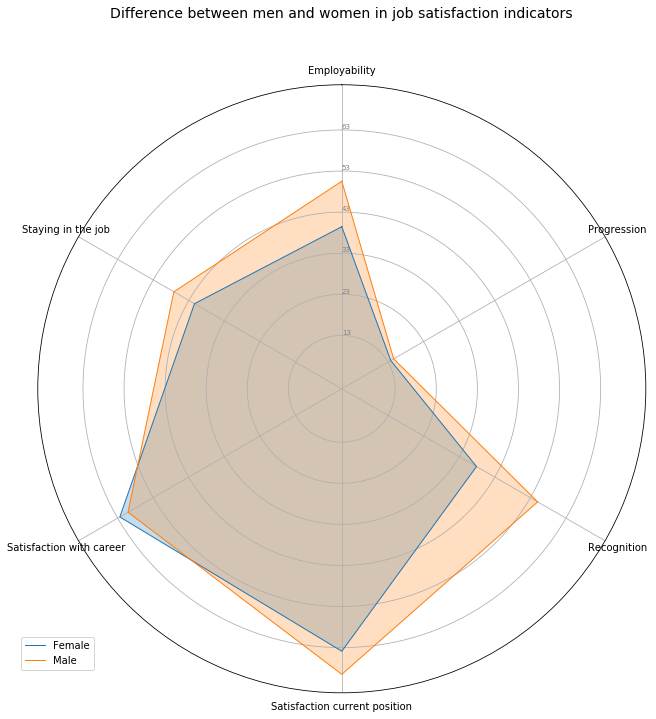

In [23]:
df_job_sat = df_job_sat.pivot(index='Gender', columns='Job satisfaction', values='Percentage')
radar_plotting(df_job_sat, title='Difference between men and women in job satisfaction indicators')

## Profile of openess of RSE 

In [24]:
needed_col = ['Year', 'Country']
open_use = ['open1can. How often do you use an open-source licence for your software?']
ref_soft = ['open2de. How often do you reference software directly or the papers describing the software?']
doi = ['open3can. How often do you associate your software with a Digital Object Identifier (DOI)?']
orcid = ['open1de. Do you have an ORCID ID?']

open_source_col = list(itertools.chain(needed_col, open_use, ref_soft, doi))#, orcid))
df_openess = df[df['Year'] == 2018][open_source_col].copy()

In [25]:
replace_likert_10 = {'1 (None at all)': 'Not using',
                     '﻿1 (None at all)': 'Not using',
                     '2': 'Rarely',
                     '3': 'Rarely',
                     '4': 'Rarely',
                     '5': 'Neutral',
                     '6': 'Neutral',
                     '7': 'Often', 
                     '8': 'Often', 
                     '9': 'Often', 
                     '10 (All the time)': 'Often'}
df_openess.replace(replace_likert_10, inplace=True)

In [26]:
df_openess.drop(['Year'], axis=1, inplace=True)
# Rename the columns:
df_openess.rename(columns = {'open1can. How often do you use an open-source licence for your software?': 'Open source licence',
                             'open2de. How often do you reference software directly or the papers describing the software?': 'Reference software',
                             'open3can. How often do you associate your software with a Digital Object Identifier (DOI)?': 'Use of DOI'}, inplace=True)

In [27]:
df_open_final = pd.DataFrame(columns = ['Country', 'What is often used', 'Percentage'])
for i in ['Open source licence', 'Reference software', 'Use of DOI']:
    df_sa = df_openess.groupby('Country')[i].value_counts().groupby(level = 0).transform(lambda x: (x/x.sum())*100).to_frame()
    df_sa.columns = ['Percentage']
    df_sa = df_sa.reset_index()
    df_sa_positive = df_sa.loc[df_sa[i] == 'Often']
    df_sa_positive = df_sa_positive.replace({'Often': i})
    df_sa_positive.columns = ['Country', 'What is often used', 'Percentage']
    df_open_final= df_open_final.append(df_sa_positive)

In [28]:
df_open_final

,Country,What is often used,Percentage
0,Australia,Open source licence,70.454545
4,Germany,Open source licence,50.675676
8,Netherlands,Open source licence,78.431373
12,New Zealand,Open source licence,82.352941
15,South Africa,Open source licence,76.190476
19,United Kingdom,Open source licence,75.700935
23,United States,Open source licence,87.681159
27,World,Open source licence,82.926829
0,Australia,Reference software,55.681818
4,Germany,Reference software,41.891892


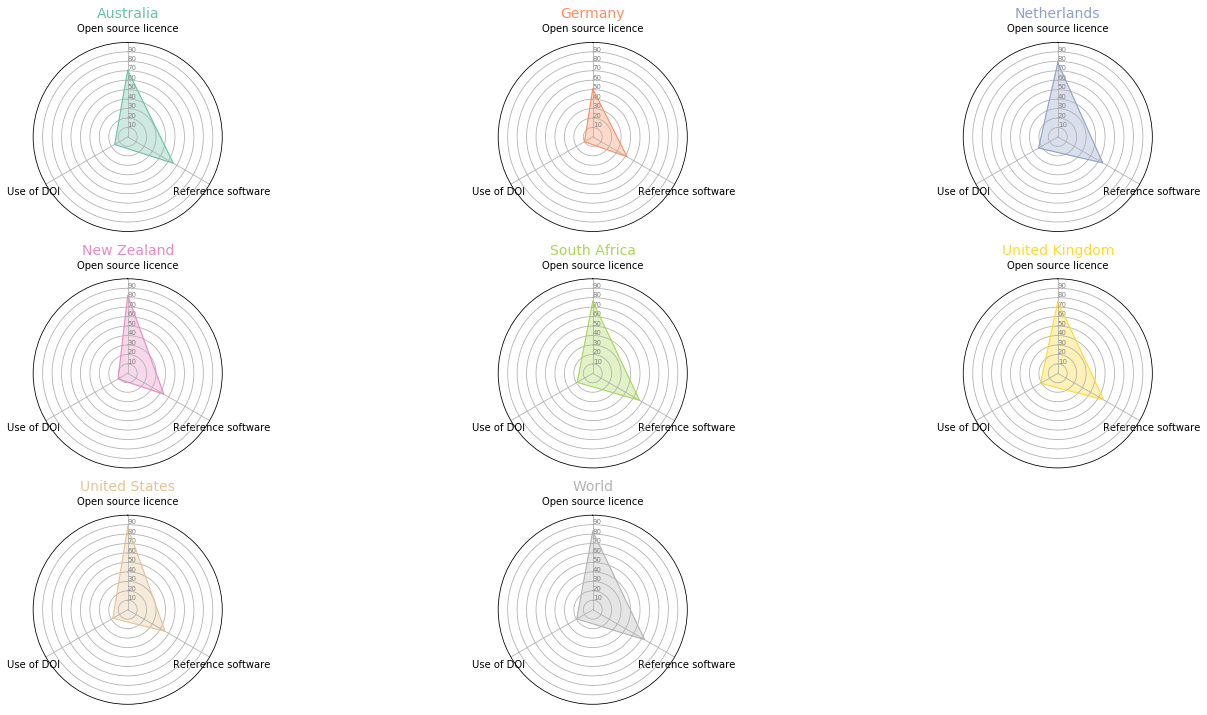

In [29]:
df_open_final = df_open_final.pivot(index='Country', columns='What is often used', values='Percentage')
radar_plotting(df_open_final, title='Openess in the different countries', subplot=True, fixed_y=True)

## Academic fields and multidisciplinarity 

In [30]:
education_column = ['edu1. What is the highest level of education you have attained?']
current_field = [x for x in df.columns if x[:len('currentEmp13')] == 'currentEmp13']

to_sample = list(itertools.chain(common_columns, education_column, current_field))
df_aca = df[to_sample].copy()

# As the No can be considered as absence of Yes, fill the value 'No' with na to keep Yes only
df_aca.replace('No', np.nan, inplace=True)
# Create a boolean column to know if the people answered or not the question about the academic field of work
df_aca['value_in_aca'] = df_aca[[x for x in current_field]].apply(lambda x: np.logical_not(all(x.isnull())) , axis=1)
# Drop the one that have not answered
df_aca = df_aca[df_aca['value_in_aca'] == True]
# As the No can be considered as absence of Yes, fill the value 'No' with na to keep Yes only
df_aca = df_aca.fillna(value='No')
    
# Create the total of participants that have answered 'Yes' at at least one field
total_answered = len(df_aca.notnull().any(axis=1))    
# Calculate the count for the column
df_final = df_aca.apply(pd.Series.value_counts, dropna=True)

# As the No can be considered as absence of Yes, fill the value 'No' with na to keep Yes only
df_final = df_final.fillna(value='No')
# Replace all the 0 with NA
df_final.fillna(value=0, inplace=True)
        
df_final = df_final.loc['Yes']

df_aca['Number of disciplines'] = df[df[current_field].apply(lambda x: x== 'Yes')].count(axis=1)
#df_aca['Number of disciplines'].dtype()

/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/frame.py:7397: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
/home/olivier/.data/git/ssi/international-survey/venv/lib/python3.7/site-packages/pandas/core/frame.py:7397: RuntimeWarning: '<' not supported between instances of 'str' and 'bool', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


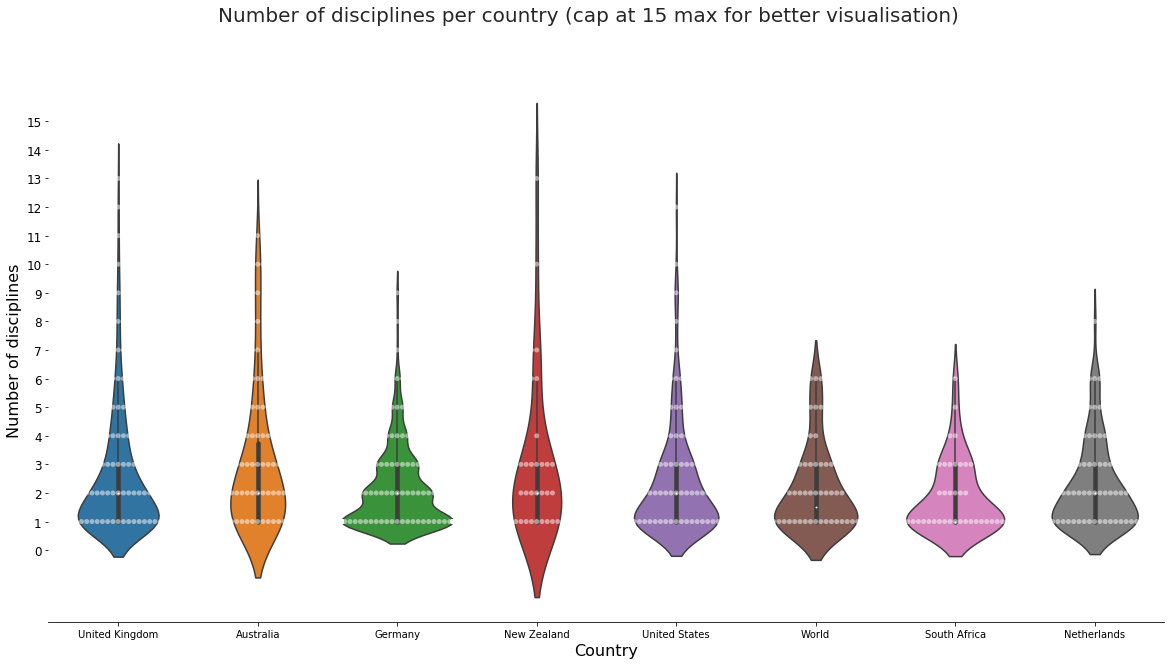

In [31]:
# Creating the figure
plt.figure(figsize=(20, 10))  
#plt.figure() 
ax = plt.subplot(111)  
sns.set_style("whitegrid")
ax = sns.violinplot(x=df_aca['Country'], y=df_aca[(df_aca['Number of disciplines'] < 15) & (df_aca['Number of disciplines'] >0)]['Number of disciplines'])#, color='#3F5D7D')
sns.swarmplot(x=df_aca['Country'], y=df_aca[(df_aca['Number of disciplines'] < 15) & (df_aca['Number of disciplines'] >0)]['Number of disciplines'], color="w", alpha=.5)
plt.yticks(range(0, 16, 1), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel("Country", fontsize=16) 
plt.ylabel("Number of disciplines", fontsize=16)
plt.suptitle('Number of disciplines per country (cap at 15 max for better visualisation)', fontsize=20)

plt.show();

In [32]:
dict_replace_field = dict()
dict_replace_field['AGRICULTURAL ENGINEERING'] = ['Agriculture & Forestry']
dict_replace_field['ANIMAL BIOLOGY'] = ['Veterinary Medicine']
dict_replace_field['APPLIED MATHEMATICS'] = ['Mathematics']
dict_replace_field['ARTIFICIAL INTELLIGENCE'] = ['Computer Science']
dict_replace_field['ASTRONOMY AND ASTROPHYSICS'] = ['Physics and Astronomy']
dict_replace_field['ATMOSPHERIC SCIENCE'] = ['Physics and Astronomy']
dict_replace_field['African languages'] = ['African languages']
dict_replace_field['BIOCHEMISTRY'] = ['Biological Sciences']
dict_replace_field['BIOMEDICAL ENGINEERING'] = ['Biological Sciences']
dict_replace_field['CELL BIOLOGY'] = ['Biological Sciences']
dict_replace_field['CHEMICAL ENGINEERING'] = ['Chemical Engineering']
dict_replace_field['CIVIL ENGINEERING'] = ['Civil Engineering']
dict_replace_field['CONDENSED MATTERPHYSICS'] = ['Physics and Astronomy']
dict_replace_field['DESIGN AND MANUFACTURING'] = ['Materials Technology']
dict_replace_field['EARTH SCIENCE'] = ['Geography & Environmental Sciences']
dict_replace_field['ELECTRICAL AND ELECTRONIC ENGINEERING'] = ['Electrical & Electronic Engineering']
dict_replace_field['ENVIRONMENTAL ENGINEERING'] = ['']
dict_replace_field['EVOLUTION AND ECOLOGY'] = ['']
dict_replace_field['FLUID MECHANICS'] = ['']
dict_replace_field['FOOD SCIENCE AND TECHNOLOGY'] = ['']
dict_replace_field['FOREST ENGINEERING'] = ['']
dict_replace_field['FUEL AND ENERGY TECHNOLOGY'] = ['']
dict_replace_field['GENETICS'] = ['']
dict_replace_field['GEOCHEMISTRY AND GEOCHRONOLOGY'] = ['']
dict_replace_field['GEOGRAPHICAL INFORMATION'] = ['']
dict_replace_field['GEOPHYSICS'] = ['']
dict_replace_field['HEALTH SCIENCES'] = ['']
dict_replace_field['HYDROLOGY'] = ['']
dict_replace_field['INDUSTRIAL ENGINEERING'] = ['']
dict_replace_field['INFORMATION TECHNOLOGY'] = ['']
dict_replace_field['INORGANIC CHEMISTRY'] = ['']
dict_replace_field['LIFE SCIENCES RESEARCH RELATED TO HUMAN HEALTH AND DISEASE'] = ['']
dict_replace_field['MATERIALS SCIENCE AND TECHNOLOGY'] = ['']
dict_replace_field['MECHANICAL ENGINEERING'] = ['']
dict_replace_field['MICROBIOLOGY'] = ['']
dict_replace_field['MINING AND MINERAL PROCESSING'] = ['']
dict_replace_field['MOLECULAR BIOLOGY'] = ['']
dict_replace_field['NALYTICAL CHEMISTRY'] = ['']
dict_replace_field['NUCLEAR ENGINEERING'] = ['']
dict_replace_field['OCEANOGRAPHY'] = ['']
dict_replace_field['ORGANIC CHEMISTRY'] = ['']
dict_replace_field['OTHER STUDIES IN NATURAL SCIENCES AND ENGINEERING'] = ['']
dict_replace_field['PHYSICAL CHEMISTRY'] = ['']
dict_replace_field['PHYSICAL GEOGRAPHY'] = ['']
dict_replace_field['PHYSICS'] = ['']
dict_replace_field['PLANT AND TREE BIOLOGY'] = ['']
dict_replace_field['POLYMER CHEMISTRY'] = ['']
dict_replace_field['PSYCHOLOGY'] = ['']
dict_replace_field['PURE MATHEMATICS'] = ['']
dict_replace_field['ROBOTICS'] = ['']
dict_replace_field['SOCIAL SCIENCES AND HUMANITIES'] = ['']
dict_replace_field['SOIL SCIENCE'] = ['']
dict_replace_field['SPACE SCIENCE'] = ['']
dict_replace_field['STATISTICS AND PROBABILITY'] = ['']
dict_replace_field['STRUCTURAL ENGINEERING'] = ['']
dict_replace_field['THEORETICAL PHYSICS AND CHEMISTRY'] = ['']

## References
Here the references that are not directly linked within the text:
* [1] http://rse.ac.uk/who/
* [2] PySankey: https://github.com/anazalea/pySankey